<a href="https://colab.research.google.com/github/chu-ise/411A-2022/blob/main/notebooks/05/02_language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilistic Language Model

## NLTK

In [1]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

sentence = "I am a boy."
tokens = word_tokenize(sentence)

bigram = bigrams(tokens)
trigram = ngrams(tokens, 3)

print("\nbigram:")
for t in bigram:
    print(t)

print("\ntrigram:")
for t in trigram:
    print(t)


bigram:
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram:
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


In [2]:
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
for t in bigram:
    print(t)

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


## Conditional Probability

In [3]:
from nltk import ConditionalFreqDist

sentence = "I am a boy."
tokens = word_tokenize(sentence)
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
cfd = ConditionalFreqDist([(t[0], t[1]) for t in bigram])

In [4]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [5]:
cfd["SS"]

FreqDist({'I': 1})

In [25]:
import nltk
nltk.download('reuters')
nltk.download('punkt')
from nltk.corpus import reuters

sentences = []
for tokens in reuters.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

sentences[:20]

[nltk_data] Downloading package reuters to /Users/yj.lee/nltk_data...
[nltk_data] Downloading package punkt to /Users/yj.lee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('SS', 'ASIAN'),
 ('ASIAN', 'EXPORTERS'),
 ('EXPORTERS', 'FEAR'),
 ('FEAR', 'DAMAGE'),
 ('DAMAGE', 'FROM'),
 ('FROM', 'U'),
 ('U', '.'),
 ('.', 'S'),
 ('S', '.-'),
 ('.-', 'JAPAN'),
 ('JAPAN', 'RIFT'),
 ('RIFT', 'Mounting'),
 ('Mounting', 'trade'),
 ('trade', 'friction'),
 ('friction', 'between'),
 ('between', 'the'),
 ('the', 'U'),
 ('U', '.'),
 ('.', 'S'),
 ('S', '.')]

In [40]:
reuters.sents()[10]

['Taiwan',
 'had',
 'a',
 'trade',
 'trade',
 'surplus',
 'of',
 '15',
 '.',
 '6',
 'billion',
 'dlrs',
 'last',
 'year',
 ',',
 '95',
 'pct',
 'of',
 'it',
 'with',
 'the',
 'U',
 '.',
 'S',
 '.']

In [26]:
cfd = ConditionalFreqDist(sentences)

In [27]:
cfd["SS"].most_common(5)

[('The', 8839), ('"', 3589), ('It', 1768), ('He', 1586), ('In', 1380)]

In [32]:
cfd["it"].most_common(5)

[('has', 806), ('said', 687), ('is', 645), ('will', 603), ('was', 492)]

In [29]:
cfd["."].most_common(5)

[('SE', 48798), ('S', 5809), ('5', 2777), ('2', 1976), ('1', 1915)]

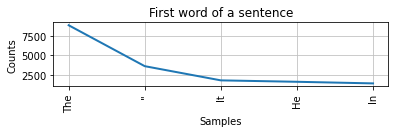

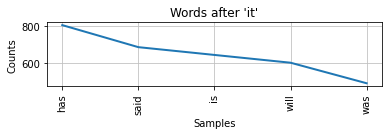

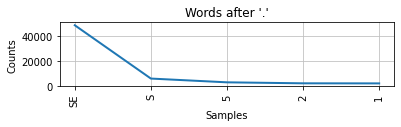

In [33]:
import matplotlib.pyplot as plt

plt.subplot(311)
cfd["SS"].plot(5, title="First word of a sentence")
plt.subplot(312)
cfd["it"].plot(5, title="Words after 'it'")
plt.subplot(313)
cfd["."].plot(5, title="Words after '.'");

In [34]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [35]:
cpd["it"].prob("is")

0.07294729699163086

In [36]:
cpd["it"].prob("are")

0.0

In [37]:
cpd["we"].prob("are")

0.1270718232044199

In [38]:
cpd["we"].prob("is")

0.0

## Bigram Language Model

In [39]:
import numpy as np

def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i + 1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [41]:
test_sentence = ['Korea','had','a','trade','surplus','.']
sentence_score(test_sentence)

2.3224455849201818e-08

In [53]:
test_sentence = ['Japan','had','a','trade','deficit','.']
sentence_score(test_sentence)

2.1900617512380006e-08

In [55]:
test_sentence = ['Korea','had','trade','surplus','.']
sentence_score(test_sentence)

2.618944670280176e-20

In [42]:
test_sentence = ['Korea','had','a','trade','.','surplus']
sentence_score(test_sentence)

2.357424056518812e-23

### Sentence Generation

In [43]:
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        else:
            w2 = w

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)

        c = w
    return "".join(sentence)

In [48]:
generate_sentence(2)

'Ame and possibly achieve further undermining the last week ended January, which made available credit 4 mln vs nine cts vs loss two cts per day to 20.'